In [1]:
import numpy as np 
import scipy.io as sio
import glob 
import matplotlib.pyplot as plt 

In [2]:
driving_cycle_paths = glob.glob("../data/driving_cycles/all/*.mat")

In [3]:
def get_min_max(driving_cycle_paths):
    v_max = 0 
    v_diff_min = 0 
    v_diff_max = 0 
    
    for cycle_path in driving_cycle_paths: 
        drv_cycle = sio.loadmat(cycle_path)
        v_veh = drv_cycle["sch_cycle"][:, 1]
        v_diff_veh = np.diff(v_veh)
        
        for v in v_veh: 
            if v > v_max: 
                v_max = v 
        
        for v_diff in v_diff_veh: 
            if v_diff > v_diff_max: 
                v_diff_max = v_diff 
            if v_diff < v_diff_min: 
                v_diff_min = v_diff 
                
    return v_max, v_diff_min, v_diff_max 

In [4]:
v_max, v_diff_min, v_diff_max = get_min_max(driving_cycle_paths)

v_diff_min = - v_diff_max 

print(v_max, v_diff_min, v_diff_max)



33.349183999999994 -4.088888888888889 4.088888888888889


In [10]:
v_grid_num = 20  
a_grid_num = 20 

v_grid = np.linspace(0, v_max, v_grid_num+1) 
a_grid = np.linspace(v_diff_min, v_diff_max, a_grid_num+1)


print(v_grid)
print(a_grid)

[ 0.         1.6674592  3.3349184  5.0023776  6.6698368  8.337296
 10.0047552 11.6722144 13.3396736 15.0071328 16.674592  18.3420512
 20.0095104 21.6769696 23.3444288 25.011888  26.6793472 28.3468064
 30.0142656 31.6817248 33.349184 ]
[-4.08888889 -3.68       -3.27111111 -2.86222222 -2.45333333 -2.04444444
 -1.63555556 -1.22666667 -0.81777778 -0.40888889  0.          0.40888889
  0.81777778  1.22666667  1.63555556  2.04444444  2.45333333  2.86222222
  3.27111111  3.68        4.08888889]


In [6]:
def get_indices(v, a, v_grid, a_grid):
    for i in range(len(v_grid) - 1): 
        if v_grid[i] <= v < v_grid[i+1]: 
            break 
    
    for j in range(len(a_grid) - 1): 
        if a_grid[j] <= a < a_grid[j+1]: 
            break
            
    return i, j 
            
    

In [7]:
def get_transition_matrix(driving_cycle_paths, v_grid, a_grid): 
    transition_matrix = np.zeros((v_grid_num, a_grid_num))
    
    for cycle_path in driving_cycle_paths: 
        drv_cycle = sio.loadmat(cycle_path)
        v_veh = drv_cycle["sch_cycle"][:, 1]
        
        for t in range(len(v_veh)-1):
            v = v_veh[t]
            a = v_veh[t+1] - v_veh[t]
            
            i, j = get_indices(v, a, v_grid, a_grid)
            transition_matrix[i, j] += 1 
            
    return transition_matrix 
            

transition_matrix = get_transition_matrix(driving_cycle_paths, v_grid, a_grid)
print(transition_matrix)

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 5.0000e+00
  5.6000e+01 2.6200e+02 5.0300e+02 6.8100e+02 1.0859e+04 6.5700e+02
  5.0500e+02 2.5300e+02 7.6000e+01 2.2000e+01 3.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 1.5000e+01 6.2000e+01
  2.3700e+02 3.6400e+02 3.8000e+02 4.8000e+02 5.2000e+02 4.6900e+02
  4.2000e+02 2.0900e+02 5.6000e+01 1.9000e+01 4.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 2.0000e+00 1.2000e+01 2.4000e+01 9.7000e+01
  2.6200e+02 2.8500e+02 5.1300e+02 6.9000e+02 8.8800e+02 7.6400e+02
  4.2300e+02 1.3400e+02 2.0000e+01 1.2000e+01 1.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00]
 [1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+01 2.9000e+01 8.5000e+01
  2.3600e+02 3.2900e+02 5.8600e+02 7.0900e+02 9.5900e+02 7.9000e+02
  4.2000e+02 1.3200e+02 2.4000e+01 3.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00]
 [0.0000e+00 1.0000e+00 5.0000e+00 6.0000e+00 1.5000e+01 7.0000e+01
  1.7400e+02 2.8

[[0.01428571 0.01428571 0.01428571 0.01428571 0.01428571 0.01454297
  0.01716694 0.02776572 0.04016526 0.04932343 0.57298546 0.04808862
  0.04026816 0.02730266 0.01819594 0.01541762 0.01444007 0.01428571
  0.01428571 0.01433716]
 [0.01428571 0.01428571 0.01428571 0.01494729 0.01759361 0.02795836
  0.06655052 0.0945574  0.09808583 0.12013849 0.12895956 0.1177127
  0.10690689 0.06037578 0.0266352  0.01847572 0.01516782 0.01428571
  0.01450624 0.01428571]
 [0.01445871 0.01428571 0.0146317  0.01636162 0.01843753 0.03106598
  0.05960973 0.06358855 0.10303083 0.13365049 0.16790299 0.14645193
  0.08746151 0.0374667  0.01774556 0.01636162 0.01445871 0.01428571
  0.01428571 0.01445871]
 [0.01445121 0.01428571 0.01478221 0.01594069 0.01908513 0.02835297
  0.05334304 0.06873428 0.11126705 0.1316232  0.17299748 0.14502847
  0.08379452 0.03613134 0.01825765 0.01478221 0.01428571 0.01428571
  0.01428571 0.01428571]
 [0.01428571 0.01445631 0.01513869 0.01530929 0.01684466 0.02622744
  0.04396943 0.06

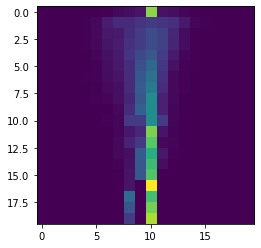

In [8]:
transition_prob_matrix = np.zeros_like(transition_matrix)
eps = 0.02

for i in range(len(transition_matrix)): 
    transition_matrix[i] += np.sum(transition_matrix[i]) * eps  
    state_sum = np.sum(transition_matrix[i])
    
    state_prob = transition_matrix[i] / state_sum 
    
    transition_prob_matrix[i] = state_prob 
    
print(transition_prob_matrix)

plt.imshow(transition_prob_matrix)

# transition matrix로 speed profile 만들기 

In [21]:
def mapping_v(v_continue): 
    for i in range(len(v_grid) - 1): 
        if v_grid[i] <= v_continue < v_grid[i+1]: 
            break 
    v_category = i 
    return v_category 

def mapping_a(v_category):
    probs = transition_prob_matrix[v_category]
    a_category = np.random.choice(len(probs), p=probs)
    a_continue = a_grid[a_category]
    return a_continue 


cycle_length = 1000 

cycle = [0]
v_t_con = 0 
for t in range(cycle_length): 
    v_t_cat = mapping_v(v_t_con)
    a_t_con = mapping_a(v_t_cat)
    
    v_t_con += a_t_con 
    v_t_con = max(min(v_t_con, v_max), 0)
    
    cycle.append(v_t_con)


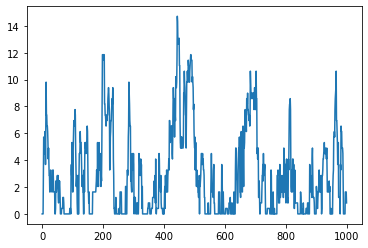

In [22]:
plt.plot(cycle)